In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

# Import train and test sets

In [2]:
train = pd.read_csv("datasets/mnist/mnisttrain.csv")
test = pd.read_csv("datasets/mnist/mnisttest.csv")

# View format of the Data

In [3]:
train.info()

In [4]:
train.describe()

In [5]:
train.head()

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
Name: 1, dtype: int64


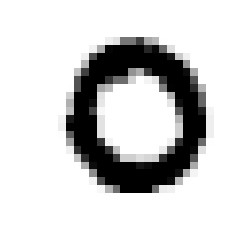

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


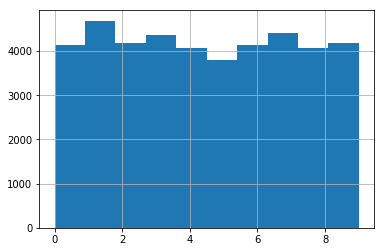

In [6]:
# print one number
myNumber = train.iloc[1,1:]
print (myNumber[:5])
myNumber=myNumber.values.reshape((28,28))
plt.imshow(myNumber, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
train['label'].hist()
print(train.columns)

# Introduce ML Model

  ## After Some testing, I found LRCV to be the most promising

In [21]:
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

labels=train['label']
features = train.drop(columns=['label'])

x1,x2,y1,y2 =train_test_split(features, labels, random_state=0, train_size =0.8, test_size=.2)


#Saga solver is known to be the best solver for multi-class classification
LRcv = LogisticRegressionCV(multi_class = 'auto', cv=5, solver='saga', tol=.4, verbose=1)
LRcv.fit(x1, y1)
y2_LRcv_model = LRcv.predict(x2)
print("Logistic RegressionCV Accuracy :", accuracy_score(y2, y2_LRcv_model))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2 epochs took 12 seconds
convergence after 2 epochs took 15 seconds
convergence after 2 epochs took 16 seconds
convergence after 2 epochs took 18 seconds
convergence after 2 epochs took 17 seconds
convergence after 2 epochs took 18 seconds
convergence after 2 epochs took 18 seconds
convergence after 2 epochs took 18 seconds
convergence after 2 epochs took 19 seconds
convergence after 2 epochs took 20 seconds
convergence after 2 epochs took 12 seconds
convergence after 2 epochs took 16 seconds
convergence after 2 epochs took 18 seconds
convergence after 2 epochs took 18 seconds
convergence after 2 epochs took 16 seconds
convergence after 2 epochs took 15 seconds
convergence after 2 epochs took 16 seconds
convergence after 2 epochs took 17 seconds
convergence after 2 epochs took 15 seconds
convergence after 2 epochs took 19 seconds
convergence after 2 epochs took 13 seconds
convergence after 2 epochs took 14 seconds
convergence after 2 epochs took 17 seconds
convergence

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.8min finished


Logistic RegressionCV Accuracy : 0.9196428571428571


In [22]:
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(target_names)
print(classification_report(y2, y2_LRcv_model, target_names=target_names, sample_weight=None, digits=4))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
              precision    recall  f1-score   support

           0     0.9554    0.9496    0.9525       813
           1     0.9670    0.9771    0.9720       961
           2     0.9309    0.9081    0.9194       860
           3     0.9083    0.8957    0.9020       863
           4     0.9362    0.9226    0.9294       827
           5     0.8827    0.8558    0.8690       756
           6     0.9091    0.9750    0.9409       841
           7     0.9362    0.9310    0.9336       899
           8     0.8642    0.8867    0.8753       768
           9     0.8911    0.8768    0.8839       812

   micro avg     0.9196    0.9196    0.9196      8400
   macro avg     0.9181    0.9179    0.9178      8400
weighted avg     0.9197    0.9196    0.9195      8400



In [23]:
print(y2_LRcv_model[0:10])
print(y2[0:10])

[3 6 9 5 6 0 6 0 0 1]
16275    3
19204    6
18518    9
25780    5
16228    6
15824    5
29252    6
28482    0
13779    0
25912    1
Name: label, dtype: int64


In [24]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [25]:
ids = list(range(1,28001))
#print(ids)
hp = LRcv.predict(test)
submission_df = {"ImageId": ids,
                 "Label": hp}
submission = pd.DataFrame(submission_df)
submission.to_csv('mnist_submission.csv', index=False)